In [76]:
import os
import re

In [71]:
def load_subject(subject_name="Dog_1"):
    root = './data/'
    root_children = os.listdir(root)
    subject_idx = root_children.index(subject_name)
    subject_path = os.path.join(root, root_children[subject_idx])
    subject_path_2 = os.path.join(subject_path, os.listdir(subject_path)[0])
    return os.listdir(subject_path_2) 

In [114]:
dog_1_files = load_subject()
print("Dog 1: Files loaded")

Dog 1: Files loaded


In [102]:
def select_segment(subject_files=None, segment_name='interictal'):
    segment_files = []
    for subject_file in subject_files:
        if re.findall(segment_name, subject_file):
            segment_files.append(subject_file)
    return segment_files

In [112]:
dog_1_preictal_files = select_segment(dog_1_files, segment_name='preictal')
print("Dog 1")
print("Preictal files:", len(dog_1_preictal_files))

Dog 1
Preictal files: 24


In [113]:
dog_1_interictal_files = select_segment(dog_1_files, segment_name='interictal')
print("Dog 1")
print("Preictal files:", len(dog_1_interictal_files))

Dog 1
Preictal files: 480


In [115]:
print("Dog 1")
print("Total files:", len(dog_1_preictal_files) + len(dog_1_interictal_files))

Dog 1
Total files: 504


In [119]:
subject_names = ['Dog_1', 'Dog_2', 'Dog_3', 'Dog_4', 'Dog_5', 'Patient_1', 'Patient_2']
preictal_count = []
interictal_count = []
total_count = []
for subject_name in subject_names:
    subject_files = load_subject(subject_name)
    interictal_files = select_segment(subject_files, 'interictal')
    preictal_files = select_segment(subject_files, 'preictal')
    interictal_count.append(len(interictal_files))
    preictal_count.append(len(preictal_files))
    total_count.append(len(interictal_files) + len(preictal_files))
print("Subject:", subject_names)
print("Interictal:", interictal_count)
print("Preictal:", preictal_count)
print("Total:", total_count)

Subject: ['Dog_1', 'Dog_2', 'Dog_3', 'Dog_4', 'Dog_5', 'Patient_1', 'Patient_2']
Interictal: [480, 500, 1440, 804, 450, 50, 42]
Preictal: [24, 42, 72, 97, 30, 18, 18]
Total: [504, 542, 1512, 901, 480, 68, 60]


In [124]:
interictal_percs = []
preictal_percs = []
for i in range(len(total_count)):
    interictal_percs.append( round((interictal_count[i] / total_count[i])*100, 1) )
    preictal_percs.append( round((preictal_count[i] / total_count[i])*100, 1) ) 
print("Subject:", subject_names)
print("Interictal %:", interictal_percs)
print("Preictal %:", preictal_percs)

Subject: ['Dog_1', 'Dog_2', 'Dog_3', 'Dog_4', 'Dog_5', 'Patient_1', 'Patient_2']
Interictal %: [95.2, 92.3, 95.2, 89.2, 93.8, 73.5, 70.0]
Preictal %: [4.8, 7.7, 4.8, 10.8, 6.2, 26.5, 30.0]


In [147]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [131]:
np.arange(len(total_count))

array([0, 1, 2, 3, 4, 5, 6])

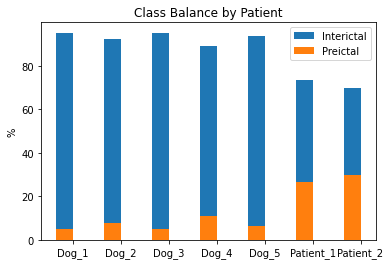

In [143]:
width = 0.35

plt.bar( np.arange(len(total_count)), interictal_percs, width, label="Interictal" )
plt.bar( np.arange(len(total_count)), preictal_percs, width, label="Preictal" )

plt.ylabel("%")
plt.legend(loc='best')
plt.xticks(np.arange(len(total_count)) + width / 2, subject_names)

plt.title('Class Balance by Patient')
plt.savefig('images/class_balance.png')

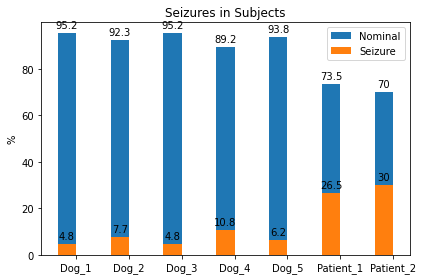

In [145]:
x = np.arange(len(subject_names))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, interictal_percs, width, label='Nominal')
rects2 = ax.bar(x-width/2, preictal_percs, width, label='Seizure')

ax.set_title('Seizures in Subjects')
ax.set_ylabel('%')
ax.set_xticks(x)
ax.set_xticklabels(subject_names)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

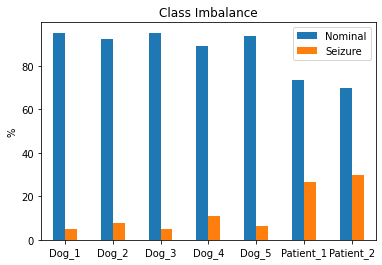

In [156]:
df = pd.DataFrame({"Nominal": interictal_percs, "Seizure": preictal_percs},
                  index=subject_names)
ax = df.plot.bar(rot=0)
ax.set_title('Class Imbalance')
ax.set_ylabel('%')

ax.legend()
fig.tight_layout()
plt.savefig('images/class_imbalance.png')
plt.show()